In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import datetime as dt
import requests
import hvplot.pandas
import scipy.stats as st
import pgeocode
import geopandas

# need to import linregress to plot correlation and regression graph
from scipy.stats import linregress

# Import API key
from Geo_key import geoapify_key

In [2]:
# Create a path to the csv file
complaints_path = "Cleaned_Data_Consumer_Complaints.csv"

# Read the customer complaints data and display columns
complaints_metadata = pd.read_csv(complaints_path)
complaints_metadata.head()

,Complaint ID,Date received,Product,Sub-product,Issue,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Timely response?,Consumer disputed?,Company response to consumer
0,3481392,12/31/2019,Mortgage,VA mortgage,Struggling to pay mortgage,No,"PENNYMAC LOAN SERVICES, LLC.",TX,78250,Consent provided,Web,12/31/2019,Yes,Unknown,Closed with non-monetary relief
1,3479162,12/28/2019,Mortgage,VA mortgage,Trouble during payment process,No,JPMORGAN CHASE & CO.,TX,75023,Consent provided,Web,12/28/2019,Yes,Unknown,Closed with explanation
2,3478150,12/27/2019,Mortgage,FHA mortgage,Trouble during payment process,No,Mr. Cooper Group Inc.,TX,78754,Consent provided,Web,12/27/2019,Yes,Unknown,Closed with explanation
3,3478892,12/27/2019,Mortgage,Conventional home mortgage,Trouble during payment process,Yes,Specialized Loan Servicing Holdings LLC,TX,76001,Consent provided,Web,12/27/2019,Yes,Unknown,Closed with explanation
4,3478257,12/26/2019,Mortgage,FHA mortgage,Trouble during payment process,Yes,"Flagstar Bank, N.A.",TX,75068,Consent provided,Web,12/26/2019,Yes,Unknown,Closed with explanation


In [3]:
#Code to country what location for pgeocode package
nomi = pgeocode.Nominatim('US') 


In [37]:
df = geopandas.tools.geocode(302023)

# get lat and lon
df['lon'] = df['geometry'].x
df['lat'] = df['geometry'].y

ModuleNotFoundError: No module named 'geopy'

In [30]:
# Define an empty list to fetch the geolocation data for each postal code
zip_data = []
postal_codes = complaints_metadata["ZIP code"]
# Create counters
record_count = 1
set_count = 1


print(type(postal_codes))

<class 'pandas.core.series.Series'>


In [31]:
postal_codes_test = (postal_codes[:5])
print(postal_codes_test)

0    78250
1    75023
2    78754
3    76001
4    75068
Name: ZIP code, dtype: int64


In [32]:
# Loop through all the zipcodes in our list to fetch geolocation data
for i, zipcode in enumerate(postal_codes_test):
    set_count += 1
    record_count = 0




print(zip_data)

[]


In [33]:
#Transform Zipcode to 
series_zip = nomi.query_postal_code(postal_codes_test) 

print(series_zip['latitude'], series_zip['longitude'])

Series([], Name: latitude, dtype: float64) Series([], Name: longitude, dtype: float64)


In [ ]:
 #Access the API Url to get a response
url = 'https://api.geoapify.com/v1/geocode/search?'


    zip_url = f"{url}appid={geoapify_key}&postcode={zipcode}"
    response = requests.get(zip_url)
    zip_data.append(response.json())


In [4]:
#Verifying there is no duplicate Customer ID's
checking = complaints_metadata["Complaint ID"].duplicated()
checking.nunique()

1

In [5]:
#checking how many unique company responses to consumers were present in the dataset
issues_df = complaints_metadata["Company response to consumer"].unique()
list(issues_df)

['Closed with non-monetary relief',
 'Closed with explanation',
 'Closed with monetary relief',
 'Untimely response',
 'Closed',
 'Closed without relief',
 'Closed with relief']

In [6]:
# Put Responses into a list for a for loop (and later for plot labels)
Responses = ["No","Yes"]

# Create empty list to fill with closed(for plotting)
Closed = []

for Resp in Responses:

# Locate the rows which contain the company response to consumer with a "No" or "Yes" Public response.  

    formula = complaints_metadata.loc[complaints_metadata["Company public response"] == Resp]['Company response to consumer'].value_counts()
     # add subset 
    Closed.append(formula)
    
display(Closed)
#Displays total Counts for each company response to consumer for each kind of response No then Yes.

[Closed with explanation            3839
 Closed with non-monetary relief     182
 Closed with monetary relief         168
 Closed without relief               158
 Closed                               80
 Closed with relief                   18
 Untimely response                    15
 Name: Company response to consumer, dtype: int64,
 Closed with explanation            2208
 Closed with non-monetary relief     165
 Closed with monetary relief         126
 Closed                                7
 Name: Company response to consumer, dtype: int64]

In [7]:
#Dataframe with only Yes Public Responses 
Yes_response_df = complaints_metadata.loc[complaints_metadata['Company public response']!="No", :]

In [8]:
# Create a variable to hold value counts of total responses per company will result same value as above for public
total_closed_yes = Yes_response_df['Company'].value_counts()
total_closed_yes

WELLS FARGO & COMPANY                    526
BANK OF AMERICA, NATIONAL ASSOCIATION    310
Ditech Financial LLC                     211
Freedom Mortgage Company                 167
LoanCare, LLC                            116
                                        ... 
BANKUNITED, NATIONAL ASSOCIATION           1
SUCCESS MORTGAGE PARTNERS, INC             1
Reverse Mortgage Solutions, Inc.           1
SYNCHRONY FINANCIAL                        1
Castle and Cookie Mortgage LLC             1
Name: Company, Length: 165, dtype: int64

In [10]:
#Adding new column to yes response dataframe
Yes_response_df["Total Closed Responses"] = Yes_response_df['Company'].map(total_closed_yes)

C:\Users\jodee\AppData\Local\Temp\ipykernel_16688\3624282959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yes_response_df["Total Closed Responses"] = Yes_response_df['Company'].map(total_closed_yes)


In [11]:
#getting counts per company for total public responses
yes_grouped_total = Yes_response_df.groupby('Company')['Total Closed Responses'].max()
yes_grouped_total

Company
1ST PREFERENCE MORTGAGE CORP        1
360 MORTGAGE GROUP LLC              2
ALLY FINANCIAL INC.                 1
AMA Advisors, LLC.                 14
AMERICAN FINANCING CORPORATION      1
                                 ... 
WELLS FARGO & COMPANY             526
WESTSTAR MORTGAGE CORPORATION       1
WOLFE FINANCIAL, INC.               1
WSFS FINANCIAL CORPORATION          1
ZIONS BANCORPORATION                8
Name: Total Closed Responses, Length: 165, dtype: int64

In [12]:
# setting new dataframe to descending order
yes_grouped_total_df = pd.DataFrame(yes_grouped_total)
yes_grouped_total_df.sort_values(by=['Total Closed Responses'], ascending=False)

,Total Closed Responses
Company,
WELLS FARGO & COMPANY,526
"BANK OF AMERICA, NATIONAL ASSOCIATION",310
Ditech Financial LLC,211
Freedom Mortgage Company,167
"LoanCare, LLC",116
...,...
"Paramount GR Holdings, LLC",1
"Panorama Mortgage Group, LLC",1
FIRST MORTGAGE COMPANY,1


In [13]:
#Found Total Public responses for top 3 Companies
yes_final_grouped_df = yes_grouped_total_df.loc[yes_grouped_total_df['Total Closed Responses']>200]
yes_final_grouped_df = pd.DataFrame(yes_final_grouped_df)
yes_final_grouped_df

,Total Closed Responses
Company,
"BANK OF AMERICA, NATIONAL ASSOCIATION",310
Ditech Financial LLC,211
WELLS FARGO & COMPANY,526


In [14]:
#Dataframe with only No Public Responses 
No_response_df = complaints_metadata.loc[complaints_metadata['Company public response']!="Yes", :]

In [15]:
# Create a variable to hold value counts of total responses per company will result same value as above for non public
total_closed_no = No_response_df['Company'].value_counts()
total_closed_no

Ocwen Financial Corporation              703
NATIONSTAR MORTGAGE LLC                  540
BANK OF AMERICA, NATIONAL ASSOCIATION    485
JPMORGAN CHASE & CO.                     381
WELLS FARGO & COMPANY                    307
                                        ... 
CHARLES SCHWAB CORPORATION, THE            1
MORTGAGE SOLUTIONS OF COLORADO             1
Santander Consumer USA Holdings Inc.       1
MORTGAGE LENDERS OF AMERICA                1
JLM R.E. INVESTMENTS                       1
Name: Company, Length: 232, dtype: int64

In [16]:
#Adding new column to yes response dataframe
No_response_df["Total Closed Responses"] = No_response_df['Company'].map(total_closed_no)

C:\Users\jodee\AppData\Local\Temp\ipykernel_16688\551786846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_response_df["Total Closed Responses"] = No_response_df['Company'].map(total_closed_no)


In [17]:
#getting counts per company for total public responses
no_grouped_total = No_response_df.groupby('Company')['Total Closed Responses'].max()
no_grouped_total

Company
1ST ALLIANCE LENDING, LLC         1
21ST MORTGAGE CORP.              12
360 MORTGAGE GROUP LLC            1
ACRE MORTGAGE                     1
ALEXANDER-ROSE ASSOC, INC.        1
                                 ..
WESTSTAR MORTGAGE CORPORATION     6
WILLOW BEND MORTGAGE              2
Williston Financial Group         1
Zeus Mortgage, Ltd.               1
iFreedom Direct Corporation       1
Name: Total Closed Responses, Length: 232, dtype: int64

In [18]:
# setting new dataframe to descending order
no_grouped_total_df = pd.DataFrame(no_grouped_total)
no_grouped_total_df.sort_values(by=['Total Closed Responses'], ascending=False)

,Total Closed Responses
Company,
Ocwen Financial Corporation,703
NATIONSTAR MORTGAGE LLC,540
"BANK OF AMERICA, NATIONAL ASSOCIATION",485
JPMORGAN CHASE & CO.,381
WELLS FARGO & COMPANY,307
...,...
"GMFS, LLC",1
"GEORGETOWN MORTGAGE, INC.",1
"GEORGE MASON MORTGAGE, LLC",1


In [19]:
#Found Total Non Public responses for top 3 Companies
no_final_grouped_df = no_grouped_total_df.loc[no_grouped_total_df['Total Closed Responses']>400]
no_final_grouped_df = pd.DataFrame(no_final_grouped_df)
no_final_grouped_df

,Total Closed Responses
Company,
"BANK OF AMERICA, NATIONAL ASSOCIATION",485
NATIONSTAR MORTGAGE LLC,540
Ocwen Financial Corporation,703


In [23]:
#BIG help from Jodee for the Merge of the two df so we can make a graph comparing the public from non
company_merge_df = pd.merge(yes_final_grouped_df, no_final_grouped_df, how='outer', on = 'Company')
display(company_merge_df)

,Total Closed Responses_x,Total Closed Responses_y
Company,,
"BANK OF AMERICA, NATIONAL ASSOCIATION",310.0,485.0
Ditech Financial LLC,211.0,NaN
WELLS FARGO & COMPANY,526.0,NaN
NATIONSTAR MORTGAGE LLC,NaN,540.0
Ocwen Financial Corporation,NaN,703.0


In [24]:
#Renaming of Columns
Bar_df = company_merge_df.rename(columns={"Total Closed Responses_x": "Top 3 Total Public Responses", "Total Closed Responses_y": "Top 3 Total No Public Responses"})
display(Bar_df)

,Top 3 Total Public Responses,Top 3 Total No Public Responses
Company,,
"BANK OF AMERICA, NATIONAL ASSOCIATION",310.0,485.0
Ditech Financial LLC,211.0,NaN
WELLS FARGO & COMPANY,526.0,NaN
NATIONSTAR MORTGAGE LLC,NaN,540.0
Ocwen Financial Corporation,NaN,703.0


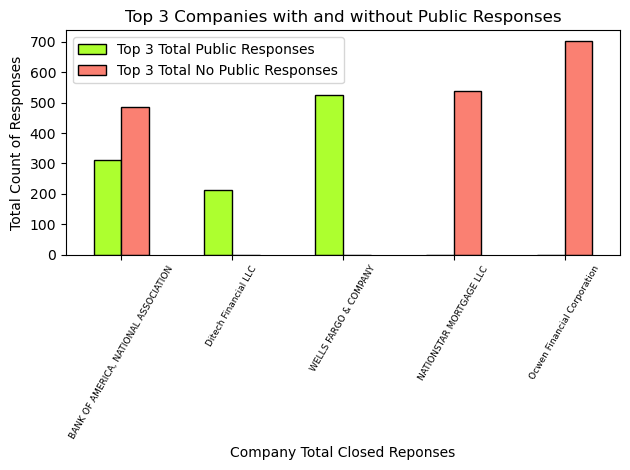

In [49]:
#Plotting Top 3 Public and NonPublic response Companies
Bar_df.plot(kind="bar",  color=["greenyellow", "salmon"], edgecolor='black')
plt.xticks(rotation=60, fontsize=6.5,horizontalalignment="center")
plt.title("Top 3 Companies with and without Public Responses")
plt.xlabel("Company Total Closed Reponses")
plt.ylabel("Total Count of Responses")
plt.tight_layout()
plt.savefig('total_Company_Reponse_Data.png')

In [32]:
#Creating dataset to create bar graph for public responses that were closed with explanation
Yes_grouped_response_df = Yes_response_df.groupby('Company')['Company response to consumer'].value_counts()
Yes_grouped_response_df

Company                        Company response to consumer
1ST PREFERENCE MORTGAGE CORP   Closed with explanation          1
360 MORTGAGE GROUP LLC         Closed with explanation          2
ALLY FINANCIAL INC.            Closed with explanation          1
AMA Advisors, LLC.             Closed with explanation         12
                               Closed with monetary relief      2
                                                               ..
WELLS FARGO & COMPANY          Closed with monetary relief     30
WESTSTAR MORTGAGE CORPORATION  Closed with explanation          1
WOLFE FINANCIAL, INC.          Closed with explanation          1
WSFS FINANCIAL CORPORATION     Closed with explanation          1
ZIONS BANCORPORATION           Closed with explanation          8
Name: Company response to consumer, Length: 220, dtype: int64

In [33]:
Yes_grouped_df = pd.DataFrame(Yes_grouped_response_df)
Yes_grouped_df = Yes_grouped_df.rename(columns= {"Company response to consumer": "# of Public Responses Per Company"})

In [34]:
# Set data frame in descending order 
Yes_grouped_df.sort_values(by=['# of Public Responses Per Company'], ascending=False)

,,# of Public Responses Per Company
Company,Company response to consumer,
WELLS FARGO & COMPANY,Closed with explanation,456
"BANK OF AMERICA, NATIONAL ASSOCIATION",Closed with explanation,225
Ditech Financial LLC,Closed with explanation,181
Freedom Mortgage Company,Closed with explanation,167
"LoanCare, LLC",Closed with explanation,116
...,...,...
"Lenderfi, Inc.",Closed with non-monetary relief,1
Lending Solutions Mortgage/ LSI Mortgage,Closed with explanation,1
Lenox Financial Mortgage Corporation,Closed with non-monetary relief,1


In [35]:
#This is to show the amount of responses closed with EXPLANATION per company top 3 PUBLIC
public_complaints_df = Yes_response_df.groupby('Company response to consumer')['Company']
pub_explanation_df = public_complaints_df.get_group('Closed with explanation').value_counts()
pub_explanation_df = pd.DataFrame(pub_explanation_df)
pub_explanation_df = pub_explanation_df.rename(columns= {"Company": "Total of Explanation Responses"})
pub_exp_top_df = pub_explanation_df.loc[pub_explanation_df['Total of Explanation Responses']>180]
pub_exp_top_df = pd.DataFrame(pub_exp_top_df)
pub_exp_top_df

,Total of Explanation Responses
WELLS FARGO & COMPANY,456
"BANK OF AMERICA, NATIONAL ASSOCIATION",225
Ditech Financial LLC,181


In [36]:
#This is to show the amount of responses closed with NON-MONETARY RELIEF top 3 Public
non_monetary_p_df = public_complaints_df.get_group('Closed with non-monetary relief').value_counts()
non_monetary_p_df = pd.DataFrame(non_monetary_p_df)
non_monetary_p_df = non_monetary_p_df.rename(columns= {"Company": "Total of Non-Monetary Responses"})
public_non_monetary_top_df = non_monetary_p_df.loc[non_monetary_p_df['Total of Non-Monetary Responses']>20]
public_non_monetary_top_df = pd.DataFrame(public_non_monetary_top_df)
public_non_monetary_top_df

,Total of Non-Monetary Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",46
WELLS FARGO & COMPANY,40
Ditech Financial LLC,25


In [37]:
#This is to show the amount of responses closed with MONETARY RELIEF top 3 Public
monetary_df = public_complaints_df.get_group('Closed with monetary relief').value_counts()
monetary_df = pd.DataFrame(monetary_df)
monetary_df = monetary_df.rename(columns= {"Company": "Total of Monetary Responses"})
monetary_top_df = monetary_df.loc[monetary_df['Total of Monetary Responses']>5]
monetary_top_df = pd.DataFrame(monetary_top_df)
monetary_top_df

,Total of Monetary Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",36
WELLS FARGO & COMPANY,30
U.S. BANCORP,6


In [38]:
#This is to show the amount of responses Closed top 3
closed_df = public_complaints_df.get_group('Closed').value_counts()
closed_df = pd.DataFrame(closed_df)
closed_df = closed_df.rename(columns= {"Company": "Total of Closed Responses"})
closed_df

,Total of Closed Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",3
"SERVICE 1ST MORTGAGE, INC.",1
Forthright Funding Corporation,1
RoundPoint Mortgage Servicing Corporation,1
ROCKY MOUNTAIN MORTGAGE COMPANY,1


In [39]:
#Creating Dataframes for No public responses
No_grouped_response_df = No_response_df.groupby('Company')['Company response to consumer'].value_counts()
No_grouped_response_df

Company                        Company response to consumer   
1ST ALLIANCE LENDING, LLC      Closed with explanation             1
21ST MORTGAGE CORP.            Closed with explanation            11
                               Closed with non-monetary relief     1
360 MORTGAGE GROUP LLC         Closed with explanation             1
ACRE MORTGAGE                  Closed with monetary relief         1
                                                                  ..
WESTSTAR MORTGAGE CORPORATION  Closed with explanation             6
WILLOW BEND MORTGAGE           Closed with explanation             2
Williston Financial Group      Closed with explanation             1
Zeus Mortgage, Ltd.            Closed with explanation             1
iFreedom Direct Corporation    Closed with explanation             1
Name: Company response to consumer, Length: 353, dtype: int64

In [40]:
No_grouped_df = pd.DataFrame(No_grouped_response_df)
No_grouped_df = No_grouped_df.rename(columns= {"Company response to consumer": "# of Non Public Responses Per Company"})

In [41]:
# Set data frame in descending order 
No_grouped_df.sort_values(by=['# of Non Public Responses Per Company'], ascending=False)

,,# of Non Public Responses Per Company
Company,Company response to consumer,
Ocwen Financial Corporation,Closed with explanation,644
NATIONSTAR MORTGAGE LLC,Closed with explanation,524
"BANK OF AMERICA, NATIONAL ASSOCIATION",Closed with explanation,331
JPMORGAN CHASE & CO.,Closed with explanation,310
WELLS FARGO & COMPANY,Closed with explanation,236
...,...,...
JLM R.E. INVESTMENTS,Untimely response,1
"LD Holdings Group, LLC",Closed with non-monetary relief,1
LENDER LIVE,Closed with explanation,1


In [42]:
#This is to show the amount of responses closed with EXPLANATION per company top 3 Non PUBLIC
non_public_complaints_df = No_response_df.groupby('Company response to consumer')['Company']
non_pub_explanation_df = non_public_complaints_df.get_group('Closed with explanation').value_counts()
non_pub_explanation_df = pd.DataFrame(non_pub_explanation_df)
non_pub_explanation_df = non_pub_explanation_df.rename(columns= {"Company": "Total of Non Public Explanation Responses"})
non_pub_explanation_df
non_pub_exp_top_df = non_pub_explanation_df.loc[non_pub_explanation_df['Total of Non Public Explanation Responses']>320]
non_pub_exp_top_df = pd.DataFrame(non_pub_exp_top_df)
non_pub_exp_top_df

,Total of Non Public Explanation Responses
Ocwen Financial Corporation,644
NATIONSTAR MORTGAGE LLC,524
"BANK OF AMERICA, NATIONAL ASSOCIATION",331


In [43]:
#This is to show the amount of responses closed with NON-MONETARY RELIEF top 3 Non Public
np_non_monetary_df = non_public_complaints_df.get_group('Closed with non-monetary relief').value_counts()
np_non_monetary_df = pd.DataFrame(np_non_monetary_df)
np_non_monetary_df = np_non_monetary_df.rename(columns= {"Company": "Total of Non Public Non-Monetary Responses"})
np_non_monetary_df
nonpublic_non_monetary_top_df = np_non_monetary_df.loc[np_non_monetary_df['Total of Non Public Non-Monetary Responses']>10]
nonpublic_non_monetary_top_df = pd.DataFrame(nonpublic_non_monetary_top_df)
nonpublic_non_monetary_top_df

,Total of Non Public Non-Monetary Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",67
WELLS FARGO & COMPANY,27
BBVA FINANCIAL CORPORATION,12


In [44]:
#This is to show the amount of responses closed with MONETARY RELIEF top 3 Non Public
np_monetary_df = non_public_complaints_df.get_group('Closed with monetary relief').value_counts()
np_monetary_df = pd.DataFrame(np_monetary_df)
np_monetary_df = np_monetary_df.rename(columns= {"Company": "Total of Non Public Monetary Responses"})
np_monetary_top_df = np_monetary_df.loc[np_monetary_df['Total of Non Public Monetary Responses']>11]
np_monetary_top_df = pd.DataFrame(np_monetary_top_df)
np_monetary_top_df

,Total of Non Public Monetary Responses
JPMORGAN CHASE & CO.,42
WELLS FARGO & COMPANY,12
BBVA FINANCIAL CORPORATION,12


In [45]:
#This is to show the amount of responses Closed top 3
np_closed_df = non_public_complaints_df.get_group('Closed').value_counts()
np_closed_df = pd.DataFrame(np_closed_df)
np_closed_df = np_closed_df.rename(columns= {"Company": "Total of Non Public Closed Responses"})
np_closed_top_df = np_closed_df.loc[np_closed_df['Total of Non Public Closed Responses']>6]
np_closed_top_df = pd.DataFrame(np_closed_top_df)
np_closed_top_df

,Total of Non Public Closed Responses
Ocwen Financial Corporation,24
PNC Bank N.A.,7
Specialized Loan Servicing Holdings LLC,7


In [48]:
issues_top3_merge_df = pd.concat([pub_exp_top_df, public_non_monetary_top_df, 
                                monetary_top_df, closed_df,non_pub_exp_top_df, nonpublic_non_monetary_top_df,
                                np_monetary_top_df, np_closed_top_df], axis=1) 
display(issues_top3_merge_df)

,Total of Explanation Responses,Total of Non-Monetary Responses,Total of Monetary Responses,Total of Closed Responses,Total of Non Public Explanation Responses,Total of Non Public Non-Monetary Responses,Total of Non Public Monetary Responses,Total of Non Public Closed Responses
WELLS FARGO & COMPANY,456.0,40.0,30.0,NaN,NaN,27.0,12.0,NaN
"BANK OF AMERICA, NATIONAL ASSOCIATION",225.0,46.0,36.0,3.0,331.0,67.0,NaN,NaN
Ditech Financial LLC,181.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
U.S. BANCORP,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
"SERVICE 1ST MORTGAGE, INC.",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Forthright Funding Corporation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
RoundPoint Mortgage Servicing Corporation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ROCKY MOUNTAIN MORTGAGE COMPANY,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Ocwen Financial Corporation,NaN,NaN,NaN,NaN,644.0,NaN,NaN,24.0
NATIONSTAR MORTGAGE LLC,NaN,NaN,NaN,NaN,524.0,NaN,NaN,NaN


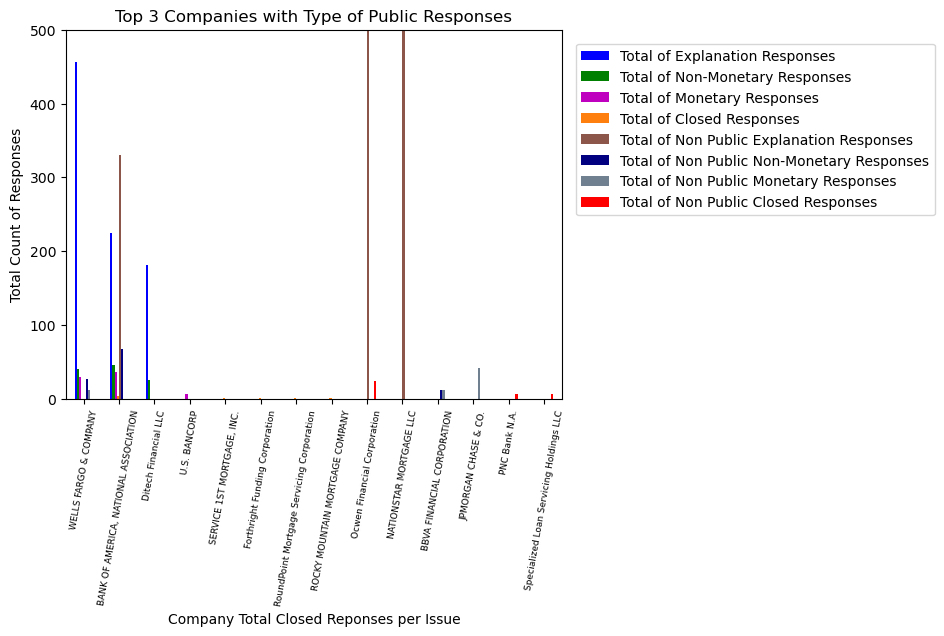

In [98]:
#Plotting Top 3 Public and NonPublic response Companies
issues_top3_merge_df.plot(kind="bar",  color=["b","g", "m", "tab:orange", "tab:brown", "navy", "slategrey", "r"])
plt.xticks(rotation=80, fontsize=6.5,horizontalalignment="center")
plt.title("Top 3 Companies with Type of Public Responses")
plt.xlabel("Company Total Closed Reponses per Issue")
plt.ylabel("Total Count of Responses")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
plt.ylim(-1, 500)

plt.savefig('total_Issue_per_Company_Reponse_Data.png')

In [20]:
#Count of how many of each type of closed response with which issues were addressed with a public or non-public response.
response_df = complaints_metadata.groupby(["Company response to consumer",("Company public response")])["Issue"].count()
display(response_df)

Company response to consumer     Company public response
Closed                           No                           80
                                 Yes                           7
Closed with explanation          No                         3839
                                 Yes                        2208
Closed with monetary relief      No                          168
                                 Yes                         126
Closed with non-monetary relief  No                          182
                                 Yes                         165
Closed with relief               No                           18
Closed without relief            No                          158
Untimely response                No                           15
Name: Issue, dtype: int64

In [121]:
#Dataframe counting the issues by company response to consumer that gave a Public Response
response_Y_df = Yes_response_df.groupby(["Company response to consumer"])["Issue"].count()
display(response_Y_df)

Company response to consumer
Closed                                7
Closed with explanation            2208
Closed with monetary relief         126
Closed with non-monetary relief     165
Name: Issue, dtype: int64

In [119]:
#Dataframe counting the issues by company response to consumer and type of issue that gave a Public Response
Detailed_response_Y_df = Yes_response_df.groupby(["Company response to consumer", "Issue"])["Issue"].count()
display(Detailed_response_Y_df)

Company response to consumer     Issue                                                                           
Closed                           Application, originator, mortgage broker                                              3
                                 Loan modification,collection,foreclosure                                              1
                                 Settlement process and costs                                                          3
Closed with explanation          Application, originator, mortgage broker                                             92
                                 Applying for a mortgage or refinancing an existing mortgage                         109
                                 Closing on a mortgage                                                                86
                                 Credit decision / Underwriting                                                       32
                                 Improp

In [202]:
#What company with which Company responses to consumers that ARE Public and the issues they had and the count of those issues. 
company_response_Y_df = Yes_response_df.groupby(["Company","Company response to consumer"])["Issue"].value_counts()
display(company_response_Y_df)

Company                       Company response to consumer  Issue                                                      
1ST PREFERENCE MORTGAGE CORP  Closed with explanation       Settlement process and costs                                   1
360 MORTGAGE GROUP LLC        Closed with explanation       Loan modification,collection,foreclosure                       1
                                                            Loan servicing, payments, escrow account                       1
ALLY FINANCIAL INC.           Closed with explanation       Application, originator, mortgage broker                       1
AMA Advisors, LLC.            Closed with explanation       Loan servicing, payments, escrow account                       5
                                                                                                                          ..
WSFS FINANCIAL CORPORATION    Closed with explanation       Applying for a mortgage or refinancing an existing mortgage    1
ZIONS

In [177]:
#Dataframe counting the issues by company response to consumer that did NOT give a Public Response
response_N_df = No_response_df.groupby(["Company response to consumer"])["Issue"].count()
display(response_N_df)

Company response to consumer
Closed                               80
Closed with explanation            3839
Closed with monetary relief         168
Closed with non-monetary relief     182
Closed with relief                   18
Closed without relief               158
Untimely response                    15
Name: Issue, dtype: int64

In [120]:
#Dataframe counting the issues by company response to consumer and type of issue that did NOT give a Public Response
Detailed_response_N_df = No_response_df.groupby(["Company response to consumer","Issue"])["Issue"].count()
display(response_N_df)

Company response to consumer     Issue                                                                           
Closed                           Application, originator, mortgage broker                                               8
                                 Credit decision / Underwriting                                                         2
                                 Loan modification,collection,foreclosure                                              32
                                 Loan servicing, payments, escrow account                                              35
                                 Settlement process and costs                                                           3
Closed with explanation          Application, originator, mortgage broker                                             244
                                 Applying for a mortgage or refinancing an existing mortgage                          103
                                

In [214]:
#What company with which Company responses to consumers that were NOT public and the issues they had and the count of those issues. 
company_response_N_df = No_response_df.groupby([ "Company","Company response to consumer"])["Issue"].value_counts()
display(company_response_N_df)

Company                      Company response to consumer  Issue                                                      
1ST ALLIANCE LENDING, LLC    Closed with explanation       Applying for a mortgage or refinancing an existing mortgage    1
21ST MORTGAGE CORP.          Closed with explanation       Loan modification,collection,foreclosure                       3
                                                           Loan servicing, payments, escrow account                       3
                                                           Struggling to pay mortgage                                     3
                                                           Application, originator, mortgage broker                       1
                                                                                                                         ..
WILLOW BEND MORTGAGE         Closed with explanation       Closing on a mortgage                                          1
             

In [152]:
# Merging Dataframes of responses counted to plot on a bar graph
merge_df = pd.merge(response_N_df, response_Y_df, how= 'outer', on="Company response to consumer")
display(merge_df)

,Issue_x,Issue_y
Company response to consumer,,
Closed,80,7.0
Closed with explanation,3839,2208.0
Closed with monetary relief,168,126.0
Closed with non-monetary relief,182,165.0
Closed with relief,18,NaN
Closed without relief,158,NaN
Untimely response,15,NaN


In [157]:
#Renaming columns to be displayed on the legend
Bar_df = merge_df.rename(columns={"Issue_x": "No Public Response", "Issue_y": "Public Response"})
display(Bar_df)

,No Public Response,Public Response
Company response to consumer,,
Closed,80,7.0
Closed with explanation,3839,2208.0
Closed with monetary relief,168,126.0
Closed with non-monetary relief,182,165.0
Closed with relief,18,NaN
Closed without relief,158,NaN
Untimely response,15,NaN


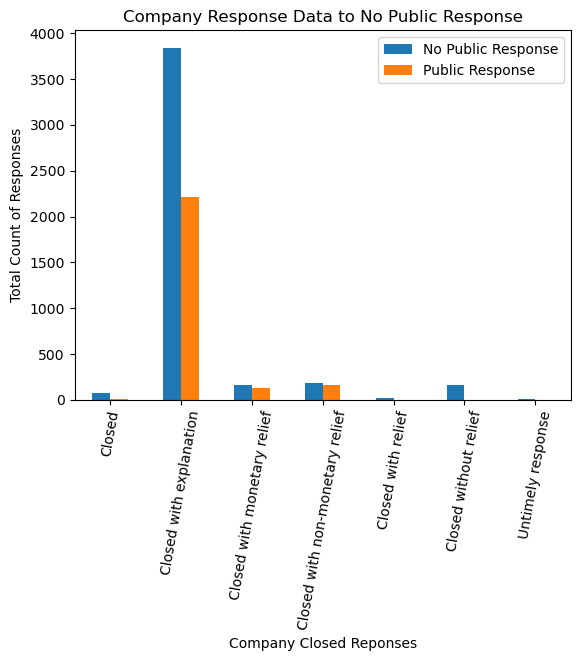

<Figure size 640x480 with 0 Axes>

In [166]:
#How to add a total count to each Bar
Bar_df.plot(kind="bar")
plt.xticks(rotation=80)
plt.title("Company Response Data to No Public Response")
plt.xlabel("Company Closed Reponses")
plt.ylabel("Total Count of Responses")
plt.show()
plt.tight_layout()
plt.savefig('Company_Reponse_Data.png')